# 0. Preprocess Data

In [1]:
import geopandas as gpd

In [2]:
filename = "./Data/General_Land_Use_Final_Dataset.geojson"
file = open(filename)
gdf = gpd.read_file(file)

In [3]:
gdf.head()

,OBJECTID,MASTER_CAT,SUB_CAT,URB,CITY_NM,AUPolyID,NAME,LUCodeID,JoinID,FID,...,PCTNEW_16_,PCT_NEW_17,HU_2017_Density,Acres,NEW_HU_17_Density,NEW_00_17_Density,Shape__Area,Shape__Length,GlobalID,geometry
0,1,Undesignated,Undesignated,,,,Mason,2,None,0,...,0.000000,0.000000,0.000000,0.000002,0.000000,0.000000,6.597900e-02,3.128234e+01,4c56ccb7-57d3-4722-8b6b-44a97d4baee0,None
1,2,Undesignated,Undesignated,,,,Mason,3,None,1,...,0.000000,0.000000,0.000000,191.430601,0.000000,0.000000,8.338683e+06,2.966529e+05,c37833a6-27ca-442c-a43f-fa7e99066352,"MULTIPOLYGON (((-123.21720 47.08491, -123.2153..."
2,3,Agricultural Area,Primary Agricultural Area,,,,Mason,4,None,2,...,0.000000,0.000000,0.012989,615.896643,0.000000,0.001624,2.682835e+07,1.269735e+05,fee71d64-d671-448b-ba30-c6953a036b49,"MULTIPOLYGON (((-123.08142 47.09216, -123.0814..."
3,4,Tribal,Tribal Inholding Lands,,,,Mason,5,None,3,...,0.013196,0.002903,0.109809,6292.763714,0.000318,0.027969,2.741115e+08,9.800588e+05,db8f9366-7822-44e4-8d4a-f1a60341a2d6,"POLYGON ((-123.42936 47.31595, -123.43451 47.3..."
4,5,Forest Lands,Primary Forest Area,,,,Mason,6,None,4,...,0.016393,0.010870,0.001892,98297.534174,0.000020,0.000346,4.281824e+09,2.550548e+06,16b46e92-682c-4a56-a6dd-2930ea9b5e1c,"POLYGON ((-123.12341 47.43258, -123.12314 47.4..."


In [4]:
gdf.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [5]:
gdf.columns

Index(['OBJECTID', 'MASTER_CAT', 'SUB_CAT', 'URB', 'CITY_NM', 'AUPolyID',
       'NAME', 'LUCodeID', 'JoinID', 'FID', 'URB_1', 'CITY_NM_1', 'AUPolyID_1',
       'NAME_1', 'LUCodeID_1', 'SubCID', 'HU_2000', 'HU_2001', 'HU_2002',
       'HU_2003', 'HU_2004', 'HU_2005', 'HU_2006', 'HU_2007', 'HU_2008',
       'HU_2009', 'HU_2010', 'HU_2011', 'HU_2012', 'HU_2013', 'HU_2014',
       'HU_2015', 'HU_2016', 'HU_2017', 'NEW_HU_00_', 'PCT_NEW_00',
       'NEW_HU_10_', 'PCT_NEW_01', 'NEW_HU_01', 'NEW_HU_02', 'NEW_HU_03',
       'NEW_HU_04', 'NEW_HU_05', 'NEW_HU_06', 'NEW_HU_07', 'NEW_HU_08',
       'NEW_HU_09', 'NEW_HU_10', 'NEW_HU_11', 'NEW_HU_12', 'NEW_HU_13',
       'NEW_HU_14', 'NEW_HU_15', 'NEW_HU_16', 'NEW_HU_17', 'NEW_00_17',
       'PCT_NEW_02', 'NEW_00_05', 'NEW_06_10', 'NEW_11_15', 'NEW_16_17',
       'NEW_17', 'PCTNEW_00_', 'PCT_NEW_06', 'PCTNEW_11_', 'PCTNEW_16_',
       'PCT_NEW_17', 'HU_2017_Density', 'Acres', 'NEW_HU_17_Density',
       'NEW_00_17_Density', 'Shape__Area', 'Shape__L

In [8]:
king = ['Algona','Auburn','Beaux Arts Village','Bellevue','Black Diamond','Bothell','Burien','Carnation','Clyde Hill',
        'Covington','Des Moines','Duvall','Enumclaw','Federal Way','Hunts Point','Issaquah','Kenmore','Kent','Kirkland',
        'Lake Forest Park','Maple Valley','Medina','Mercer Island','Milton','Newcastle','Normandy Park','North Bend',
        'Pacific','Redmond','Renton','Sammamish','SeaTac','Seattle','Shoreline','Skykomish','Snoqualmie','Tukwila',
        'Woodinville','Yarrow Point']

In [13]:
kin_gdf = gdf[gdf['CITY_NM'].isin(king)]

In [15]:
kin_gdf.to_file('./Data/king_gdf.geojson', driver="GeoJSON")  

## 1. Load filtered data

In [16]:
filename = "./Data/king_gdf.geojson"
file = open(filename)
king_gdf = gpd.read_file(file)

<Axes: >

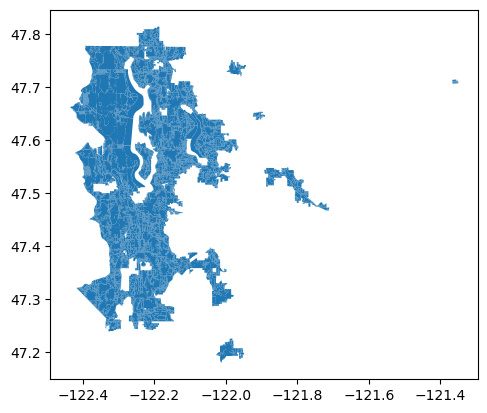

In [17]:
king_gdf.plot()

In [21]:
king_gdf['MASTER_CAT'].value_counts()

MASTER_CAT
Intensive Urban                          1877
Urban Character Residential              1429
ROW                                       753
PROW                                      717
Undesignated                              381
Industrial                                281
Water                                     260
Rural Character Residential               116
Active Open Space and Recreation          107
Public                                     78
Natural Preservation and Conservation      25
Agricultural Area                          20
Mineral Resource Area                       8
Forest Lands                                5
Tribal                                      1
Name: count, dtype: int64

In [22]:
king_gdf['SUB_CAT'].value_counts()

SUB_CAT
Traditional Single Family Residential (3.1-12 Units/Acre)               1144
Commercial/Office                                                        917
ROW                                                                      753
PROW                                                                     717
Residential (12+ Units/Acre)                                             632
Undesignated                                                             381
Mixed Use                                                                291
Water                                                                    260
Low Density Urban Residential (1.1-3 Units/Acre)                         222
Light Industrial                                                         144
Heavy Industrial                                                         117
Active Open Space and Recreation                                         107
Public                                                              